<a href="https://colab.research.google.com/github/endar1y12/Pengolahan-Citra-Digital/blob/main/Pertemuan_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perbedaan konvolusi dan Morfologi**

Konvolusi : dikali dan dijumlah semua untuk menggantikan nilai tengah (rgb 0 - 255)

morfologi : nilai structur elemen bernilai 1 untuk perhitungan dikalikan dan dijumlahkan semua dan hasil maksimalnya 9 (biner 0-1)

Morfologi erosi

0= hit/miss

1= fit jika jumlah total = ukuran dari structur dari elemen

contoh: structur elemen 3x3 maka jumlah total = 9

Morfologi Dilasi

0= miss

1= hit/fit


#Data


In [ ]:
from keras.datasets import mnist #untuk mengambil gambar biasanya terkebal digunakan untuk mechine learning

(xtrain,_), (xtest,_)= mnist.load_data()




11490434/11490434 [==============================] - 0s 0us/step


(28, 28)


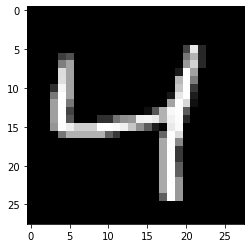

In [ ]:
import matplotlib.pyplot as plt

img_a = xtrain[2]
plt.imshow(img_a,cmap=plt.cm.gray)
print(img_a.shape)

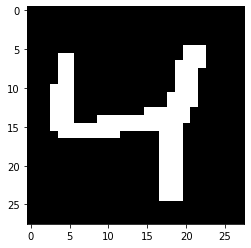

In [ ]:
img_a[img > 0] = 1
plt.imshow(img_a,cmap=plt.cm.gray)

#Operasi Erosi


[[ 8  8  8 ... 18 19 18]
 [ 8  8  8 ... 18 18 18]
 [ 8  8  8 ... 17 18 17]
 ...
 [16 16 16 ... 26 26 26]
 [16 16 16 ... 27 27 26]
 [16 16 16 ... 27 27 26]]


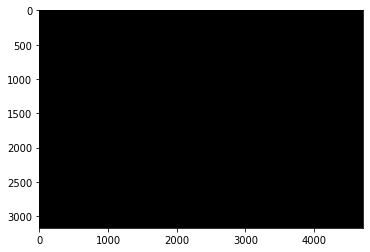

In [ ]:
import math
import numpy as np
import cv2

image = cv2.imread('/content/pexels-bess-hamiti-35537.jpg',0)
print(image)

def erosi(img,struc):
#jumlah padding
  pad_size = math.floor(struc.shape[0]/2)
#buat gambar baru
  img_padd = np.zeros((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
#gambar lama masuk kedalam gambar ke padding
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
#apply erosi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
     for c in range (img_akhir.shape[1]):
       for i in range(struc.shape[0]):
         for j in range (struc.shape[1]):
           img_akhir[r,c] +=struc[i,j]*img_padd[r+i,c+j]
       if img_akhir[r,c] == struc.shape[0]*struc.shape[1]:
          img_akhir[r,c] = 1
       else:
          img_akhir[r,c] = 0

        #######
        #jika hit/miss -> 0
        #jika fit -> 1
        #######
  return img_akhir

struc_elem = np.ones([3,3])
# print(struc_elem)

img_erosi = erosi(image,struc_elem)

plt.imshow(img_erosi,cmap= plt.cm.gray)


#Operasi Dilasi

[[ 8  8  8 ... 18 19 18]
 [ 8  8  8 ... 18 18 18]
 [ 8  8  8 ... 17 18 17]
 ...
 [16 16 16 ... 26 26 26]
 [16 16 16 ... 27 27 26]
 [16 16 16 ... 27 27 26]]


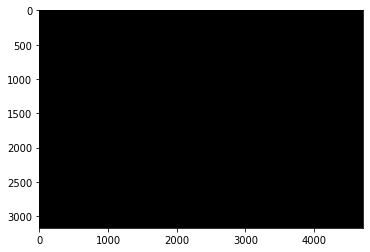

In [ ]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('pexels-bess-hamiti-35537.jpg',0)
print(image)
def dilasi(img,struc):
#jumlah padding
  pad_size = math.floor(struc.shape[0]/2)
#buat gambar baru
  img_padd = np.zeros((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
#gambar lama masuk kedalam gambar ke padding
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
#apply dilasi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
     for c in range (img_akhir.shape[1]):
       for i in range(struc.shape[0]):
         for j in range (struc.shape[1]):
           img_akhir[r,c] +=struc[i,j]*img_padd[r+i,c+j]
       if img_akhir[r,c] > 0:
          img_akhir[r,c] = 1
       else:
          img_akhir[r,c] = 0

        #######
        #jika miss -> 0
        #jika fit/hit -> 1
        #######
  return img_akhir

struc_elem = np.ones([3,3])
# print(struc_elem)

img_dilasi  = dilasi(image,struc_elem)
plt.imshow(img_dilasi,cmap= plt.cm.gray)

#Opening = Erosi -> Dilasi


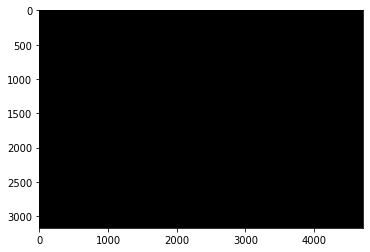

In [ ]:
def opening(img,struc):
  return dilasi(erosi(img,struc),struc)

struc_elem = np.ones([3,3])
img_op = opening(image,struc_elem)

plt.imshow(img_op,cmap=plt.cm.gray)

#Closeing = Dilasi -> Erosi


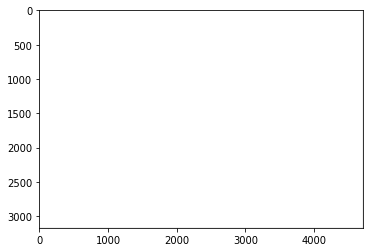

In [ ]:
def closeing(img,struc):
  return erosi(dilasi(img,struc),struc)

struc_elem = np.ones([3,3])
img_cl = closeing(image,struc_elem)

plt.imshow(img_cl,cmap=plt.cm.gray)